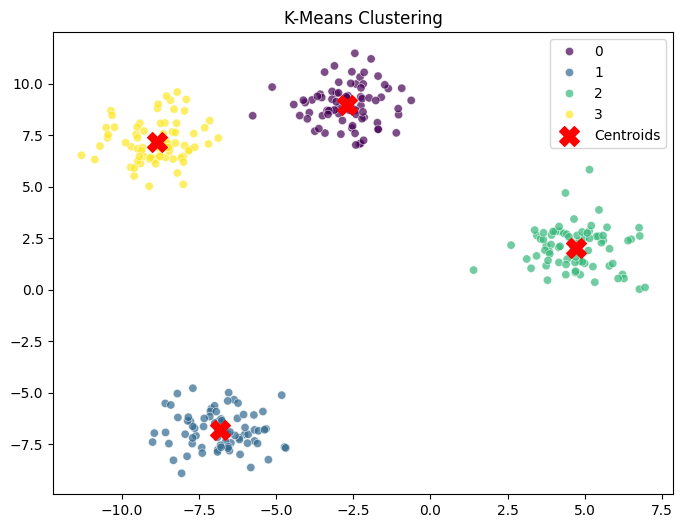

PageRank Scores: {'https://www.example.com': 0.012224236680506699, 'https://www.iana.org/domains/example': 0.022614813635585124, 'http://pti.icann.org': 0.017029713263097775, 'http://www.icann.org/': 0.017029713263097775, 'https://www.icann.org/privacy/policy': 0.01723314561716004, 'https://www.icann.org/privacy/tos': 0.01723314561716004, 'https://www.cloudflare.com/5xx-error-landing': 0.026698399503563727, 'https://account.icann.org/authorize?redirect_uri=https://www.icann.org/oauth&client_id=0oa9o9k9rp8VUcyJL2p7&nonce=6f5398ba-8a62-4370-99a8-e00d981b692d&state=https://www.icann.org/': 0.012427669034568965, 'https://account.icann.org/registeraccount?redirect_uri=https://www.icann.org/oauth&client_id=0oa9o9k9rp8VUcyJL2p7&nonce=6f5398ba-8a62-4370-99a8-e00d981b692d&state=https://www.icann.org/': 0.012427669034568965, 'https://www.icann.org/history': 0.012427669034568965, 'https://info.icann.org/LP---Regional-Newsletter.html': 0.012427669034568965, 'https://subscribe.icann.org/': 0.012427

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import networkx as nx
import requests
from bs4 import BeautifulSoup

# Generate sample data for clustering
def generate_data():
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
    return X

# Perform K-Means Clustering
def perform_kmeans(X, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    return labels, kmeans.cluster_centers_

# Visualize Clustering Results
def visualize_clusters(X, labels, centers):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', alpha=0.7)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

# PageRank Algorithm Implementation
def get_links(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        links = [a['href'] for a in soup.find_all('a', href=True) if a['href'].startswith('http')]
        return links
    except:
        return []

# Build a web graph and compute PageRank
def compute_pagerank(start_url, max_pages=5):
    G = nx.DiGraph()
    urls_to_visit = [start_url]
    visited = set()
    
    while urls_to_visit and len(visited) < max_pages:
        url = urls_to_visit.pop(0)
        if url in visited:
            continue
        visited.add(url)
        links = get_links(url)
        for link in links:
            G.add_edge(url, link)
            if link not in visited:
                urls_to_visit.append(link)
    
    pagerank = nx.pagerank(G)
    return pagerank

# Run Clustering
X = generate_data()
labels, centers = perform_kmeans(X)
visualize_clusters(X, labels, centers)

# Run PageRank
start_url = "https://www.example.com"  # Replace with a real website
pagerank_scores = compute_pagerank(start_url)
print("PageRank Scores:", pagerank_scores)